Thông số tính toán:
n=   256, p=0.25: L(n)=4.00, E[X]=17.333, Var(X)=40.444
n=  4096, p=0.25: L(n)=6.00, E[X]=25.333, Var(X)=64.444
n= 65536, p=0.25: L(n)=8.00, E[X]=33.333, Var(X)=88.444
n=   256, p=0.5: L(n)=8.00, E[X]=18.000, Var(X)=18.000
n=  4096, p=0.5: L(n)=12.00, E[X]=26.000, Var(X)=26.000
n= 65536, p=0.5: L(n)=16.00, E[X]=34.000, Var(X)=34.000


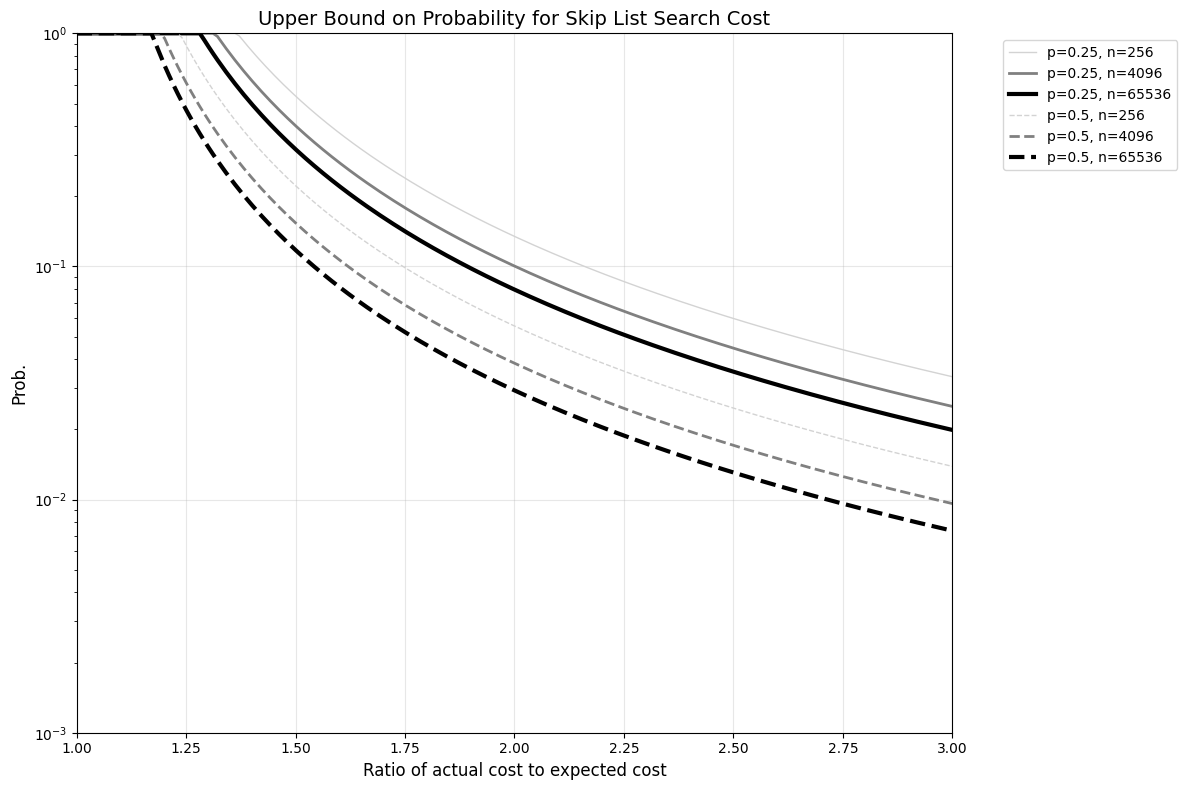

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

def skip_list_expected_cost(n, p):
    """Tính giá trị kỳ vọng với L(n) = log_{1/p}(n)"""
    L_n = math.log(n) / math.log(1/p)  # log_{1/p}(n) = ln(n)/ln(1/p)
    return L_n / p + 1 / (1 - p)

def skip_list_variance(n, p):
    """Tính phương sai với L(n) = log_{1/p}(n)"""
    L_n = math.log(n) / math.log(1/p)
    term1 = (1 - p) * L_n / (p ** 2)
    term2 = p / ((1 - p) ** 2)
    term3 = (2 * p - 1) / (p ** 2)
    return term1 + term2 + term3

def calculate_upper_bound(r_values, expected_cost, variance):
    """Tính upper bound sử dụng Chebyshev inequality"""
    bounds = []
    for r in r_values:
        if r <= 1:
            bounds.append(1.0)
        else:
            t = (r - 1) * expected_cost
            if t > 0:
                bound = variance / (t ** 2)
                bounds.append(min(bound, 1.0))
            else:
                bounds.append(1.0)
    return bounds

# Tạo đồ thị với công thức đúng
plt.figure(figsize=(12, 8))
plt.yscale('log')

r_values = np.linspace(1.0, 3.0, 200)

# Sử dụng p = 1/4 và p = 1/2 như trong ảnh gốc
configs = [
    {"n": 256, "p": 1/4, "color": "lightgray", "linestyle": "-", "linewidth": 1},
    {"n": 4096, "p": 1/4, "color": "gray", "linestyle": "-", "linewidth": 2},
    {"n": 65536, "p": 1/4, "color": "black", "linestyle": "-", "linewidth": 3},
    {"n": 256, "p": 1/2, "color": "lightgray", "linestyle": "--", "linewidth": 1},
    {"n": 4096, "p": 1/2, "color": "gray", "linestyle": "--", "linewidth": 2},
    {"n": 65536, "p": 1/2, "color": "black", "linestyle": "--", "linewidth": 3}
]

print("Thông số tính toán:")
print("=" * 50)

for config in configs:
    n = config["n"]
    p = config["p"]
    
    # Tính L(n), E[X] và Var(X)
    L_n = math.log(n) / math.log(1/p)
    expected = skip_list_expected_cost(n, p)
    variance = skip_list_variance(n, p)
    
    # Tính upper bound
    bounds = calculate_upper_bound(r_values, expected, variance)
    
    # Vẽ đường
    plt.plot(r_values, bounds,
             color=config["color"],
             linestyle=config["linestyle"],
             linewidth=config["linewidth"],
             label=f"p={p}, n={n}")
    
    print(f"n={n:>6}, p={p}: L(n)={L_n:.2f}, E[X]={expected:.3f}, Var(X)={variance:.3f}")

print("=" * 50)

# Tùy chỉnh đồ thị
plt.xlabel('Ratio of actual cost to expected cost', fontsize=12)
plt.ylabel('Prob.', fontsize=12)
plt.title('Upper Bound on Probability for Skip List Search Cost', fontsize=14)
plt.ylim(1e-3, 1)
plt.xlim(1.0, 3.0)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()